In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import polyfit, poly1d

In [ ]:
df = pd.read_csv("C:\\Users\\idarlene\\Desktop\\codigos\\Python\\Strava_PB_PY\\PY_PB_Strava\\data\\processed\\data.csv")

In [ ]:
df.info()

In [ ]:
df.columns

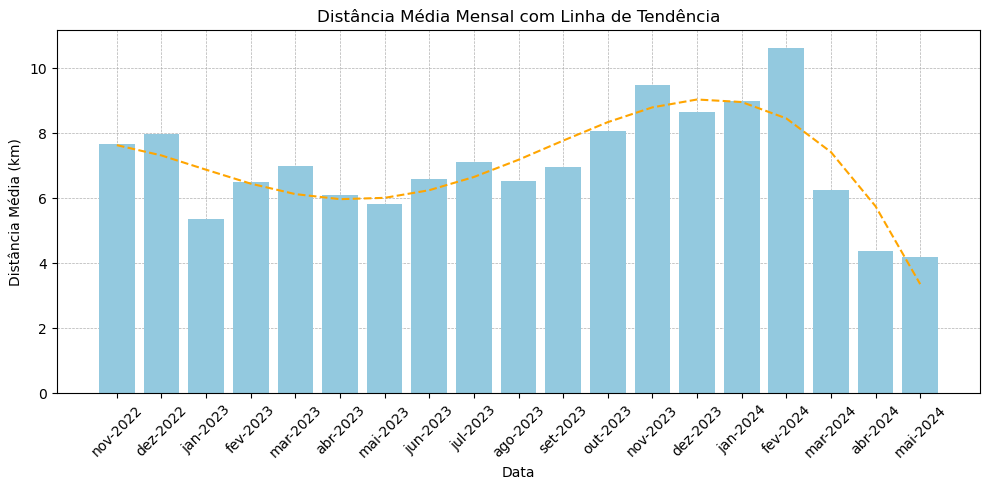

In [122]:
# Distância média por mês
df_distancia = df[df["distance"] > 0].reset_index()
agrupado = df_distancia.groupby(df_distancia["data"])["distance"].sum().reset_index()
agrupado['data'] = pd.to_datetime(agrupado['data'])
agrupado.set_index('data', inplace=True)
distancia_mensal = agrupado.resample('M')['distance'].mean()
distancia_mensal  = distancia_mensal.reset_index()

distancia_mensal['mes_ano'] = distancia_mensal['data'].dt.strftime('%b-%Y')

# Substituindo os nomes dos meses em inglês pelos equivalentes em português
meses_portugues = {
    'Jan': 'jan', 'Feb': 'fev', 'Mar': 'mar', 'Apr': 'abr',
    'May': 'mai', 'Jun': 'jun', 'Jul': 'jul', 'Aug': 'ago',
    'Sep': 'set', 'Oct': 'out', 'Nov': 'nov', 'Dec': 'dez'
}

distancia_mensal['mes_ano'] = distancia_mensal['mes_ano'].replace(meses_portugues, regex=True)

# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='mes_ano', y='distance', data=distancia_mensal, color='skyblue', zorder=2)

# Calculando a linha de tendência
z = polyfit(distancia_mensal.index, distancia_mensal['distance'], 5)
p = poly1d(z)

# Adicionando a linha de tendência ao gráfico
plt.plot(distancia_mensal.index, p(distancia_mensal.index), color='orange', linestyle='--')

# Adicionando linhas de grade
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)

# Ajustando as labels do eixo x para melhor visualização
plt.xticks(rotation=45)

# Adicionando título e labels
plt.title('Distância Média Mensal com Linha de Tendência')
plt.xlabel('Data')
plt.ylabel('Distância Média (km)')

# Mostrando o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# tempo médio em movimento
agrupado = df

In [ ]:
# ganho de elevação médio